A couple of days ago, I quickly threw together a procedure for random placement of gene loci on a chromosome.
Today I implemented some code (`shuffle_iloci.py`) that is a bit less abstract, in that it will actually create a GFF3 file with the new randomly placed genes.

In [1]:
!gt select -seqid PdomSCFr1.2-0025 pdom-annot-r1.2.gff3 > pdom-scf25.gff3
!locuspocus --verbose pdom-scf25.gff3 > pdom-scf25-loci.gff3
!./shuffle_iloci.py -s 1234 pdom-scf25-loci.gff3 > pdom-scf25-shuf.gff3
!locuspocus --verbose pdom-scf25-shuf.gff3 > pdom-scf25-loci-shuf.gff3

Random seed: 1234


We can take a look at the distribution of loci before and after shuffling.

In [3]:
%matplotlib inline
from __future__ import print_function
import seaborn
seaborn.set_context({"figure.figsize": (12, 8)})

In [4]:
def plot_hist_rug(data, bins=30, xlim=None, ylim=None, title=None):
    """Boilerplate code for visualizations."""
    plot = seaborn.distplot(data, bins=bins, kde=False, rug=True)
    seaborn.plt.xlabel('Genomic position', fontsize=16)
    seaborn.plt.ylabel('Frequency', fontsize=16)
    if title:
        seaborn.plt.title(title, fontsize=18)
    if xlim is not None:
        _ = plot.set(xlim=(xlim[0], xlim[1]))
    if ylim is not None:
        _ = plot.set(ylim=(ylim[0], ylim[1]))

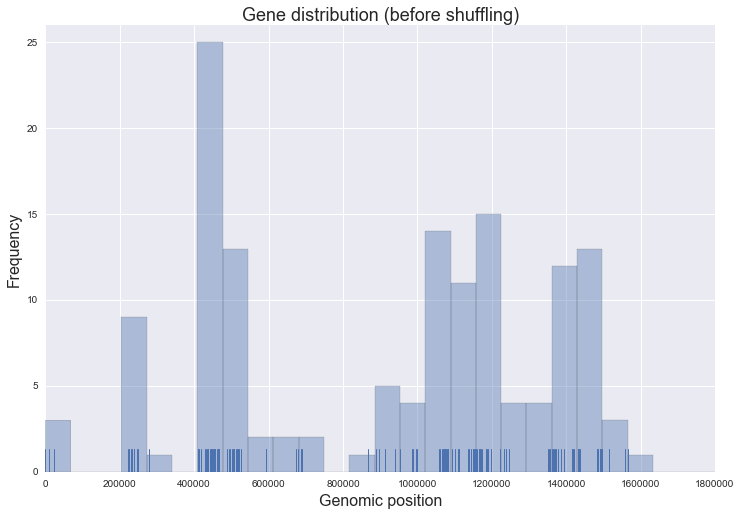

In [5]:
with open('pdom-scf25-loci.gff3', 'r') as instream:
    starts = list()
    for line in instream:
        if '\tlocus\t' in line:
            start = int(line.split('\t')[3])
            starts.append(start)
    plot_hist_rug(starts, xlim=(0, 1800000), ylim=(0, 26),
                  title='Gene distribution (before shuffling)')

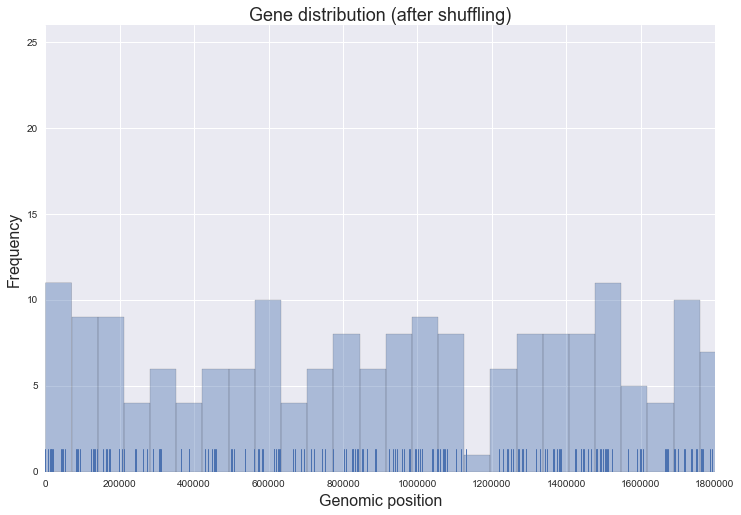

In [6]:
with open('pdom-scf25-loci-shuf.gff3', 'r') as instream:
    starts = list()
    for line in instream:
        if '\tlocus\t' in line:
            start = int(line.split('\t')[3])
            starts.append(start)
    plot_hist_rug(starts, xlim=(0, 1800000), ylim=(0, 26),
                  title='Gene distribution (after shuffling)')

The `shuffle_iloci.py` code is available [here](shuffle_iloci.py).